# Working with complicated dataset

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [2]:
### Your code here . . .
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

blast_file = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"
columns = ["query acc.ver", "subject acc.ver", "% identity", "alignment length", "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end", "evalue", "bit score", "% positives", "bonds", "publications"]
blast = pd.read_csv(blast_file,
                      skiprows = 7,
                      na_values=['-'], 
                      names=columns,
                      usecols=columns,
                      decimal=","
                     )
blast.drop('query acc.ver', axis=1, inplace=True)
blast.set_index('subject acc.ver', inplace=True)
blast.head(5)

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100,318,0,0,1,318,1,318,0,629,100,1.487,9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100,17.947,47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100,12.106,13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2.319,41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100,18.964,3.0


### Question 2
What is the average number of publications?

In [ ]:
### Your code here . . .
#blast.groupby('publications').mean()
blast['publications'].mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [ ]:
### Your code here . . .
blast[(blast["bonds"] > 15.000)].index.tolist()

['AGK29621.1',
 'AHG32084.1',
 '6G2J_H',
 'YP_002791042.1',
 'AGK29634.1',
 '0806162F',
 'YP_009112408.1',
 'YP_001876469.1',
 'YP_009092269.1',
 'AHG32149.1',
 'YP_009092074.1',
 'YP_009450474.1',
 'YP_004123270.1',
 'YP_009092073.1',
 'AHZ60901.1',
 'YP_004123350.1',
 'YP_009453754.1',
 'ADD46492.1',
 'YP_007025968.1',
 'YP_009453806.1',
 'YP_007024956.1',
 'ASM92364.1',
 'YP_006073044.1',
 'ASM92494.1',
 'ADG95699.1',
 'YP_004891275.1',
 'YP_009166014.1',
 'YP_009538416.1',
 'YP_009414182.1',
 'YP_009178854.1',
 'YP_009414415.1',
 'YP_009353908.1',
 'YP_009093743.1',
 'ABX45285.1',
 'YP_009414156.1',
 'YP_009414363.1']

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

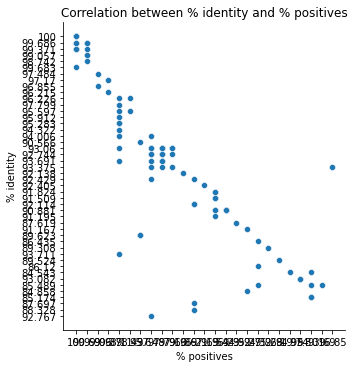

In [5]:
### Your code here . . .
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(data=blast, 
           x="% positives", 
           y="% identity"
           )

plt.title("Correlation between % identity and % positives");


### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [8]:
### Your code here . . .
protein_file = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv" 

protein = pd.read_csv(protein_file)
protein.drop('Unnamed: 0', axis=1, inplace=True)
protein.set_index('Protein', inplace=True)
protein
#blast.index.equals(protein.index)
blast["Protein source"] = protein
blast

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein source
subject acc.ver,,,,,,,,,,,,,,
NP_904328.1,100,318,0,0,1,318,1,318,0,629,100,1.487,9.0,RefSeq
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100,17.947,47.0,NaN
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100,12.106,13.0,GenPept
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2.319,41.0,NaN
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100,18.964,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,17.348,6.0,NaN
ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,7.105,19.0,NaN
YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,18.940,37.0,GenPept
